# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/bader/Desktop/BootCamp_HW_Assignments/HW6(API)/python_api_challenge/weatherpy/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [55]:
pd.DataFrame(output_data)

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


## Generate Cities List

In [56]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [57]:
pd.DataFrame(cities)

,0
0,taolanaro
1,rikitea
2,mataura
3,busselton
4,dikson
...,...
617,nea alikarnassos
618,asfi
619,kamaishi
620,soure


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [58]:
url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + "metric"
# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json

{'coord': {'lon': -68.3, 'lat': -54.8},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 8,
  'feels_like': 1.28,
  'temp_min': 8,
  'temp_max': 8,
  'pressure': 982,
  'humidity': 36},
 'visibility': 10000,
 'wind': {'speed': 5.7, 'deg': 340},
 'clouds': {'all': 75},
 'dt': 1603849714,
 'sys': {'type': 1,
  'id': 8303,
  'country': 'AR',
  'sunrise': 1603788854,
  'sunset': 1603841976},
 'timezone': -10800,
 'id': 3833367,
 'name': 'Ushuaia',
 'cod': 200}

In [59]:
api_key = weather_api_key
units = "metric"

query_url2 = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="


In [147]:
city_name = []
max_temp = []
humidity = []
cloudiness = []
lat = []
lng = []
wind_speed = []
country = []
date = []

count = 0
set_count = 1

for city in cities:
    try:
        response = requests.get(query_url2 + city).json()
        cloudiness.append(response['clouds']['all'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity']) 
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        name = response['name']
        city_name.append(city)
        if count > 50:
            set_count = 1 + set_count
            count = 1
        else:
            count = 1 + count    
        
        print(f"Processing record {count} of set {set_count} | {city}")
    except:
        print("could not find city... Skipping")


could not find city... Skipping
Processing record 1 of set 1 | rikitea
Processing record 2 of set 1 | mataura
Processing record 3 of set 1 | busselton
Processing record 4 of set 1 | dikson
Processing record 5 of set 1 | albany
Processing record 6 of set 1 | hanzhong
Processing record 7 of set 1 | beringovskiy
Processing record 8 of set 1 | mackay
Processing record 9 of set 1 | saskylakh
Processing record 10 of set 1 | flinders
Processing record 11 of set 1 | punta arenas
Processing record 12 of set 1 | kidal
could not find city... Skipping
Processing record 13 of set 1 | yaan
Processing record 14 of set 1 | new norfolk
could not find city... Skipping
could not find city... Skipping
Processing record 15 of set 1 | rabat
Processing record 16 of set 1 | vao
Processing record 17 of set 1 | aksu
Processing record 18 of set 1 | east london
Processing record 19 of set 1 | lebu
Processing record 20 of set 1 | sitka
Processing record 21 of set 1 | mahibadhoo
Processing record 22 of set 1 | herm

Processing record 36 of set 4 | gorontalo
could not find city... Skipping
Processing record 37 of set 4 | pangnirtung
Processing record 38 of set 4 | ponta do sol
Processing record 39 of set 4 | hobyo
Processing record 40 of set 4 | belaya gora
Processing record 41 of set 4 | okha
Processing record 42 of set 4 | djambala
Processing record 43 of set 4 | saint-joseph
Processing record 44 of set 4 | kruisfontein
Processing record 45 of set 4 | hithadhoo
Processing record 46 of set 4 | bristol
Processing record 47 of set 4 | vila velha
Processing record 48 of set 4 | leningradskiy
Processing record 49 of set 4 | llanelli
Processing record 50 of set 4 | sobolevo
Processing record 51 of set 4 | abalak
Processing record 1 of set 5 | lewisporte
Processing record 2 of set 5 | arraial do cabo
Processing record 3 of set 5 | baherden
Processing record 4 of set 5 | nizhniy kuranakh
Processing record 5 of set 5 | nassau
Processing record 6 of set 5 | santa isabel
Processing record 7 of set 5 | aswan

Processing record 20 of set 8 | port hedland
Processing record 21 of set 8 | terrak
Processing record 22 of set 8 | nemuro
Processing record 23 of set 8 | visnes
could not find city... Skipping
Processing record 24 of set 8 | svay rieng
Processing record 25 of set 8 | nipawin
Processing record 26 of set 8 | mincivan
Processing record 27 of set 8 | catia la mar
Processing record 28 of set 8 | saint-augustin
Processing record 29 of set 8 | belyy yar
Processing record 30 of set 8 | baykit
Processing record 31 of set 8 | bukachacha
Processing record 32 of set 8 | saint anthony
Processing record 33 of set 8 | shakawe
Processing record 34 of set 8 | namikupa
Processing record 35 of set 8 | san quintin
Processing record 36 of set 8 | kollam
Processing record 37 of set 8 | santiago del estero
Processing record 38 of set 8 | tura
Processing record 39 of set 8 | howard springs
Processing record 40 of set 8 | cabedelo
Processing record 41 of set 8 | the valley
Processing record 42 of set 8 | puer

Processing record 51 of set 11 | mailsi
Processing record 1 of set 12 | haines junction
Processing record 2 of set 12 | biak
Processing record 3 of set 12 | athens
Processing record 4 of set 12 | nea alikarnassos
Processing record 5 of set 12 | asfi
Processing record 6 of set 12 | kamaishi
Processing record 7 of set 12 | soure
could not find city... Skipping


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [190]:
city_data = {"City": city_name,
           "Lat": lat, 
           "Lng": lng,
           "Max Temp": max_temp, 
           "Humidity": humidity,
           "Cloudiness": cloudiness, 
           "Wind Speed": wind_speed, 
           "Country": country,
           "Date": date}


In [191]:
pd.DataFrame(df).head(10)

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,-23.12,-134.97,23.67,82,99,6.10,PF,1603902909
1,-46.19,168.86,8.89,90,93,0.89,NZ,1603902994
2,-33.65,115.33,14.44,47,0,5.41,AU,1603902994
3,73.51,80.55,-15.47,93,28,9.82,RU,1603902994
4,42.60,-73.97,8.33,90,100,0.53,US,1603902853
5,33.07,107.03,10.84,79,90,0.42,CN,1603902994
6,63.05,179.32,-3.49,96,46,6.36,RU,1603902994
7,-21.15,149.20,20.00,94,31,3.28,AU,1603902994
8,71.92,114.08,-14.95,91,100,6.05,RU,1603902994
9,-34.58,150.86,15.56,88,100,0.45,AU,1603902995


In [178]:
city_data.describe()

AttributeError: 'dict' object has no attribute 'describe'

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [205]:
k = 100

count_humidity = sum(i > k for i in humidity) 
print("Number of cities with humidity greater than 100% : " + str(count_humidity))

Number of cities with humidity greater than 100% : 0


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

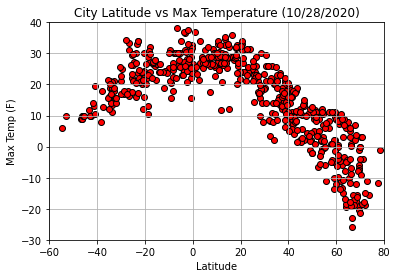

In [242]:
plt.scatter(city_data["Lat"], city_data["Max Temp"], marker='o',color = "red", edgecolors= "black")
plt.title("City Latitude vs Max Temperature (10/28/2020)")


plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.ylim(-30,40)
plt.xlim(-60, 80)
plt.grid()


plt.savefig("Lat_Vs_Temp.png")

plt.show()

## Latitude vs. Humidity Plot

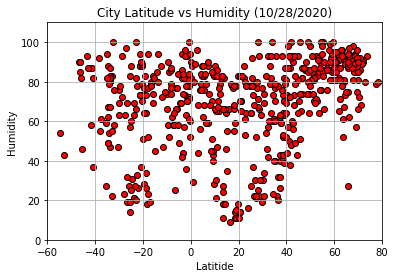

In [243]:
plt.scatter(city_data["Lat"], city_data["Humidity"], marker='o',color = "red", edgecolors= "black")
plt.title("City Latitude vs Humidity (10/28/2020)")


plt.ylabel("Humidity")
plt.xlabel("Latitide")
plt.ylim(0,110)
plt.xlim(-60, 80)
plt.grid()


plt.savefig("Lat_Vs_Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

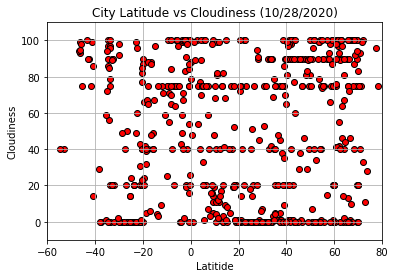

In [244]:
plt.scatter(city_data["Lat"], city_data["Cloudiness"], marker='o',color = "red", edgecolors= "black")
plt.title("City Latitude vs Cloudiness (10/28/2020)")


plt.ylabel("Cloudiness")
plt.xlabel("Latitide")
plt.ylim(-10,110)
plt.xlim(-60, 80)
plt.grid()


plt.savefig("Lat_Vs_Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

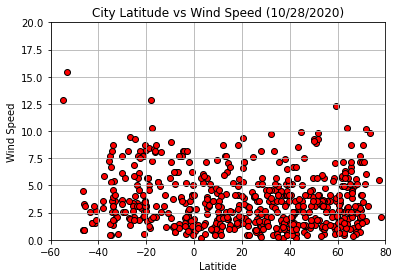

In [245]:
plt.scatter(city_data["Lat"], city_data["Wind Speed"], marker='o',color = "red", edgecolors= "black")
plt.title("City Latitude vs Wind Speed (10/28/2020)")


plt.ylabel("Wind Speed")
plt.xlabel("Latitide")
plt.ylim(0,20)
plt.xlim(-60, 80)
plt.grid()


plt.savefig("Lat_Vs_WindSpeed.png")

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


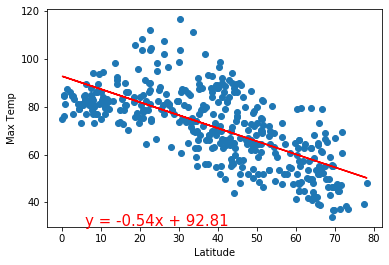

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


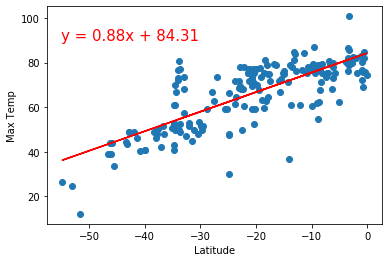

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


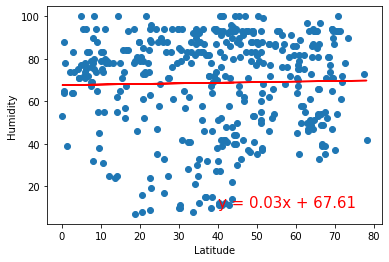

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


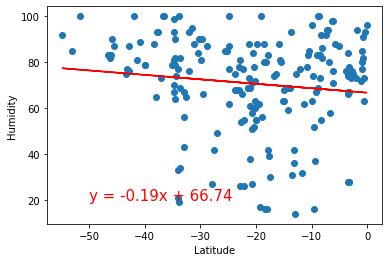

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


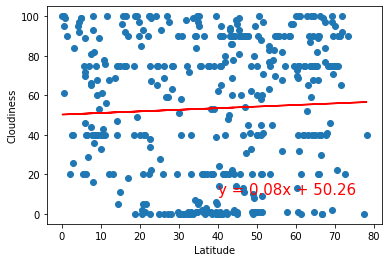

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


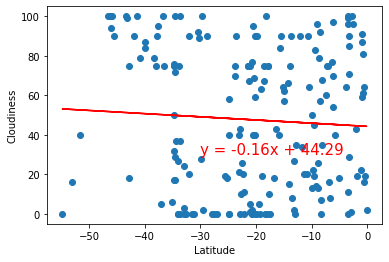

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


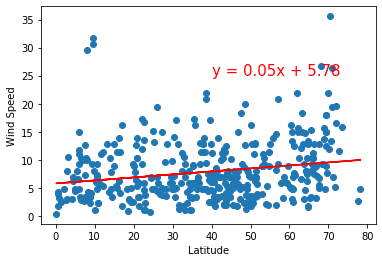

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


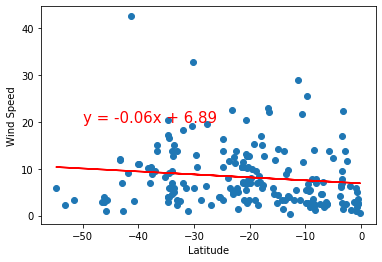